In [1]:
"""Analyse relationships between items in the average_first_pulse_fit table 
"""
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
import os
import numpy as np


In [2]:
#load data from csv created from extract_first_pulse_fit_from_DB.py
#df=pd.read_csv('average_fit_dynamic_weight_2018_10_29.csv')
#df=pd.read_csv('average_fit_latency_jitter_2018_11_01.csv')
#df=pd.read_csv('average_fit_vclamp_2018_11_15.csv') #note that this version did not have the zero weight cross-talk
#df=pd.read_csv('average_fit_vclamp_2018_12_06.csv') #note that this version did not have the zero weight cross-talk
df=pd.read_csv('average_fit_vclamp_2018_12_10.csv') #note that this version did not have the zero weight cross-talk
df['uid']=df.apply(lambda row: "%.3f" % float(row.uid), axis=1)

In [3]:
df.keys()


Index([u'Unnamed: 0', u'NRMSE', u'acsf', u'amp', u'boolean_connection',
       u'decay_tau', u'distance', u'latency', u'measured_amp',
       u'measured_baseline', u'n_sweeps', u'post_cell_id', u'post_cre',
       u'post_layer', u'pre_cell_id', u'pre_cre', u'pre_layer', u'rise_time',
       u'syn_excitation', u'uid', u'image_path'],
      dtype='object')

In [ ]:
plotting_df=df[df.distance<1e10]
sns.set(style="ticks")
sns.pairplot(plotting_df, vars=['distance','amp','decay_tau', 'latency', 'rise_time', 'NRMSE'], hue='boolean_connection')

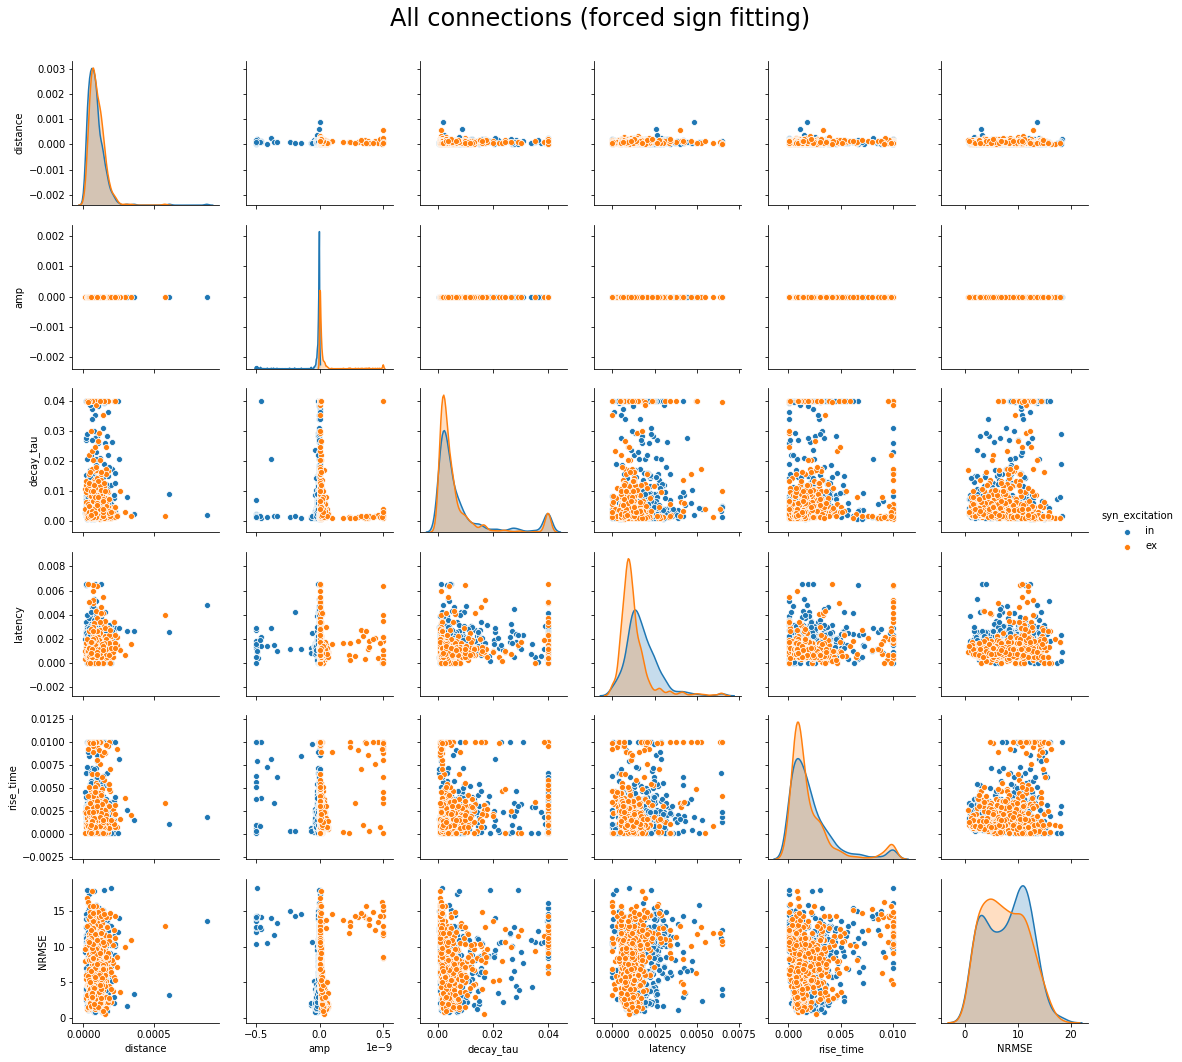

In [4]:
plotting_df=df[(df.distance<1e10) & (df.boolean_connection==True)]
g=sns.pairplot(plotting_df, 
             vars=['distance','amp','decay_tau', 'latency', 'rise_time', 'NRMSE'], 
             hue='syn_excitation')
g.fig.suptitle('All connections (forced sign fitting)', fontsize=24)
g.fig.subplots_adjust(top=.93)

In [ ]:
df.keys()

In [ ]:
# Lets look at the short latency blip.
short_latency=df[(df.distance<1e10) & (df.boolean_connection==True) & (df.latency<.00001) & 
                 (df.syn_excitation=='in') & (df.n_sweeps>=10)][['uid','pre_cell_id','post_cell_id', 'amp',
                                             'image_path', 'latency', 'NRMSE', 'n_sweeps']].sort_values(by='uid')


In [ ]:
pd.options.display.max_colwidth=200
print(short_latency[['uid','pre_cell_id', 'post_cell_id', 'latency', 'amp', 'NRMSE', 'n_sweeps']].to_string())

In [ ]:
from IPython.display import Image, display 
for p in short_latency['image_path']:
    if type(p) is str:
        print type(p)
        display(Image(filename=p)) 


In [ ]:
# Lets look for neurons that have been miss any-sign fit.
missfit=df[(df.distance<1e10) & (df.boolean_connection==True) & (df.amp>0) & 
                 (df.syn_excitation=='in')][['uid','pre_cell_id','post_cell_id', 'amp',
                                             'image_path', 'latency', 'NRMSE', 'n_sweeps']].sort_values(by='uid')
print(missfit[['uid','pre_cell_id', 'post_cell_id', 'latency', 'amp', 'NRMSE', 'n_sweeps']].to_string())

from IPython.display import Image, display 
for p in missfit['image_path']:
    if type(p) is str:
        print type(p)
        display(Image(filename=p)) 

In [ ]:
#in voltage clamp it looks like the many of the excitatory cells have a zero amp
#remember in vclamp inhibitory cells should have a postive sign
low_amp=df[(df.distance<1e10) & (df.boolean_connection==True) & (df.amp<1.e-13) & 
                 (df.syn_excitation=='ex')][['uid','pre_cell_id','post_cell_id', 'amp',
                                             'image_path', 'latency', 'NRMSE', 'n_sweeps']].sort_values(by='uid')
print(low_amp[['uid','pre_cell_id', 'post_cell_id', 'latency', 'amp', 'NRMSE', 'n_sweeps']].to_string())

from IPython.display import Image, display 
for p in low_amp['image_path']:
    if type(p) is str:
        print type(p)
        display(Image(filename=p)) 

In [ ]:
plotting_df=df[(df.distance<1e10) & (df.boolean_connection==True)]
g=sns.pairplot(plotting_df, 
             vars=['distance','amp','decay_tau', 'latency', 'rise_time', 'NRMSE'], 
             hue='acsf')
g.fig.suptitle('All connections (any sign fitting)', fontsize=24)
g.fig.subplots_adjust(top=.93)

In [ ]:
import matplotlib.pyplot as plt
plotting_df=df[(df.distance<1e10) & (df.boolean_connection==True) & (df.pre_layer=='5') & (df.post_layer=='5')]
pre_cre=['sim1', 'tlx3', 'pvalb', 'sst', 'vip']
post_cre=['sim1', 'tlx3', 'pvalb', 'sst', 'vip']
for pre_c in pre_cre:
    for post_c in post_cre:
        plotting_df=df[(df.distance<1e10) & (df.boolean_connection==True) & 
                   (df.pre_layer=='5') & (df.post_layer=='5') &
                   (df.pre_cre==pre_c) & (df.post_cre==post_c)]
        if len(plotting_df)>4:
            g=sns.pairplot(plotting_df, 
                 vars=['distance','amp','decay_tau', 'latency', 'rise_time', 'NRMSE'], 
                 hue='acsf')
            g.fig.suptitle('Layer 5 '+pre_c+' to '+post_c+' (any sign fitting)', fontsize=24)
            g.fig.subplots_adjust(top=.93)

In [ ]:
plotting_df=df[(df.distance<1e10) & (df.boolean_connection==True) & (df.NRMSE<8)]
sns.set(style="ticks")
sns.pairplot(plotting_df, vars=['distance','amp','decay_tau', 'latency', 'rise_time', 'NRMSE'], hue='syn_excitation')

In [ ]:
#make plots seperately

low_ca_df=df[(df.distance<1e10) & (df.boolean_connection==True) & (df.acsf=='1.3mM Ca & 1mM Mg')]
high_ca_df=df[(df.distance<1e10) & (df.boolean_connection==True) & (df.acsf=='2mM Ca & Mg')]
pre_cre=['sim1', 'tlx3', 'pvalb', 'sst', 'vip']
post_cre=['sim1', 'tlx3', 'pvalb', 'sst', 'vip']
for pre_c in pre_cre:
    for post_c in post_cre:
        low_ca_df=df[(df.distance<1e10) & (df.boolean_connection==True) & (df.acsf=='1.3mM Ca & 1mM Mg') &
                     (df.pre_layer=='5') & (df.post_layer=='5') &
                     (df.pre_cre==pre_c) & (df.post_cre==post_c)]
        high_ca_df=df[(df.distance<1e10) & (df.boolean_connection==True) & (df.acsf=='2mM Ca & Mg') &
                      (df.pre_layer=='5') & (df.post_layer=='5') &
                     (df.pre_cre==pre_c) & (df.post_cre==post_c)]
        plt.figure()
        if len(low_ca_df) > 1:
            sns.distplot(low_ca_df['latency'], kde=False)
        if len(low_ca_df) >1: 
            sns.distplot(high_ca_df['latency'], kde=False)
        plt.title(pre_c+' to '+post_c)

In [ ]:
layer5_exclusions=[(1533760229.35, 1, 8),
(1533760229.35, 2, 3),
(1533760229.35, 2, 7),
(1533760229.35, 2, 8),
(1530911027.48, 5, 8),
(1526677592.22, 5, 4), 
(1524865937.59, 8, 6),
(1523470754.85, 4, 7),
(1522789170.88, 8, 5),
(1517348193.99, 1, 8), 
(1516233523.01, 6, 7),
(1512427735.49, 7, 6),
(1510784600.16, 5, 6),
(1508882414.56, 1, 7),
(1507235159.78, 3, 5), 
(1506536788.12, 1, 2),
(1503438194.62, 5, 4),
(1502914763.89, 2, 8),
(1503350239.42, 6, 5),
(1501697476.75, 3, 2),
(1500674097.51, 4, 8),
(1500674097.51, 4, 1),
(1500668871.65, 1, 4),
(1499458608.76, 7, 6), 
(1499277221.97, 6, 8),
(1497468556.18, 8, 6),
(1497417667.38, 5, 8),
(1497417667.38, 5, 2),
(1496435165.25, 1, 2),
(1496356414.74, 3, 6),
(1496356414.74, 4, 3),
(1496204446.61, 6, 3),
(1496183885.88, 2, 3),
(1495659736.17, 7, 8),
(1494630290.65, 5, 4),
(1494624188.37, 2, 4),
(1494452978.66, 2, 4),
(1494452978.66, 4, 3),
(1494633087.98, 3, 2),
(1493765516.34, 7, 3),
(1493411823.75, 5, 8), 
(1492635468.58, 8, 5),
(1492630859.95, 1, 6),
(1492460382.78, 6, 2),
(1491344474.78, 4, 1),
(1490997794.08, 3, 2),
(1490997794.08, 6, 7),
(1490997794.08, 8, 7),
(1487794887.82, 5, 1),
(1487978611.61, 2, 1),
(1487715029.49, 5, 6),
(1487207362.08, 5, 6),
(1486511976.48, 7, 2),
(1486769398.43, 8, 7),
(1486753952.16, 1, 2)]
layer5_exclusions=[(str(a[0]), a[1], a[2]) for a in layer5_exclusions]

L5_df=df[(df.distance<1e10) & (df.boolean_connection==True) & (df.pre_layer=='5') & (df.post_layer=='5') 
             & (df.latency > .0002)]
L5_df['for_exclusion']=L5_df.apply(lambda row:(row['uid'], row['pre_cell_id'], row['post_cell_id']), axis=1)
L5_df=L5_df[~L5_df['for_exclusion'].isin(layer5_exclusions)]

In [ ]:
len(L5_df)

In [ ]:
L5_df['rise time (ms)']=L5_df['rise_time']*1000.
L5_df['amp (mV)']=L5_df['amp']*1000.
L5_df['latency (ms)']=L5_df['latency']*1000.

In [ ]:
# layer 5 histograms

plot_key="latency (ms)" 
#plot_key="amp (mV)"
#plot_key="rise time (ms)"

cres=['sim1', 'tlx3', 'pvalb', 'sst', 'vip']
plotting_df=L5_df[(df.distance<1e10) & (L5_df.boolean_connection==True) & 
                  (L5_df.pre_layer=='5') & (L5_df.post_layer=='5') & 
               ((L5_df.pre_cre ==cres[0]) |
                (L5_df.pre_cre ==cres[1]) |
                (L5_df.pre_cre ==cres[2]) |
                (L5_df.pre_cre ==cres[3]) |
                (L5_df.pre_cre ==cres[4])) &
              ((L5_df.post_cre ==cres[0]) |
                (L5_df.post_cre ==cres[1]) |
                (L5_df.post_cre ==cres[2]) |
                (L5_df.post_cre ==cres[3]) |
                (L5_df.post_cre ==cres[4]))]

sns.set(font_scale=1.5)
g = sns.FacetGrid(plotting_df, col='pre_cre', row='post_cre', hue='acsf', 
                  margin_titles=True, row_order=cres, col_order=cres, sharex=False, sharey=False)
#g = (g.map(sns.kdeplot, plot_key, alpha=1).add_legend())
g = (g.map(plt.hist, plot_key, alpha=.5).add_legend())
g.fig.suptitle('Layer 5', fontsize=24)
g.fig.subplots_adjust(top=.93)

#put better margin titles that don't use column key as a title
[plt.setp(ax.texts, text="") for ax in g.axes.flat] # remove the original texts
g.set_titles(row_template = 'post= {row_name}', col_template = 'pre={col_name}')
g.axes[0][0].get_xlim()

#flatten columns for kstest
flattened_cres=[]
for post in cres:
    for pre in cres:
        flattened_cres.append((pre,post))
        
from scipy import stats    
for a, cre_pair in zip(g.axes.flat, flattened_cres):
    #need to calculate p here
    ca13 = plotting_df[(plotting_df['pre_cre']==cre_pair[0]) & (plotting_df['post_cre']==cre_pair[1]) 
                       & (plotting_df['acsf']=='1.3mM Ca & 1mM Mg')][plot_key].values
    ca20 = plotting_df[(plotting_df['pre_cre']==cre_pair[0]) & (plotting_df['post_cre']==cre_pair[1]) 
                     & (plotting_df['acsf']=='2mM Ca & Mg')][plot_key].values
    if (len(ca13) > 3) and (len(ca20) > 3):
        _, p = stats.ks_2samp(ca13, ca20)
    else:
        p=np.nan
    x_annotate = (a.get_xlim()[0]+a.get_xlim()[1])/2
    y_annotate = (a.get_ylim()[0]+a.get_ylim()[1])/5*4
    print (cre_pair, a.get_xlim(), a.get_ylim())
    a.text(x_annotate, y_annotate, 'p=%.3f' %p)



In [ ]:
plotting_df[(plotting_df['pre_cre']==cre_pair[0]) & (plotting_df['pre_cre']==cre_pair[1]) 
                       & (plotting_df['acsf']=='1.3mM Ca & 1mM Mg')]['rise_time'].values

In [ ]:
#Look to see if we believe fitting that leads to differences in distributions

closer_look=df[(df.distance<1e10) & (df.boolean_connection==True) & (df.pre_layer=='5') & (df.post_layer=='5') 
               & (df.latency > .0002)]
 
#                 (df.pre_cre =='pvalb') & (df.post_cre =='sst')]
print(len(closer_look))

from IPython.display import Image, display 
for p in closer_look['image_path']:
    if type(p) is str:
        print type(p)
        display(Image(filename=p)) 

In [ ]:
g= sns.PairGrid(plotting_df,col='pre_cre', row='post_cre', hue='acsf', margin_titles=True, sharex=False, sharey=False)
g= (g.map(plt.hist, "latency", alpha=.5))

